In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, Input, BatchNormalization

import matplotlib.pyplot as plt

**Load Data**

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print(f'X train: {X_train.shape}\ny train: {y_train.shape}\n\nX test: {X_test.shape}\ny test: {y_test.shape}')

X train: (60000, 28, 28)
y train: (60000,)

X test: (10000, 28, 28)
y test: (10000,)


In [5]:
SAMPLE_SIZE = 12

In [6]:
y_train[0:SAMPLE_SIZE]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

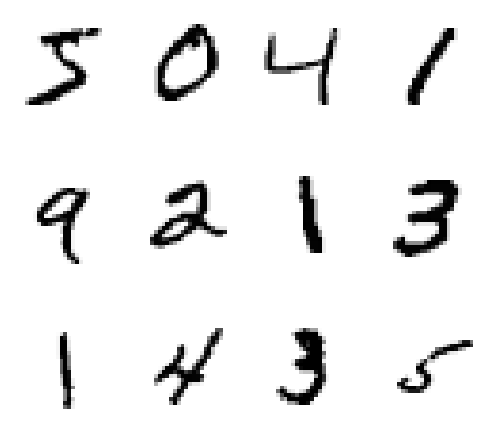

In [7]:
plt.figure(figsize=(5, 5))

for i in range(SAMPLE_SIZE):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

**Preprocess Data**

In [8]:
def reshape_image_data(data, rows):
    return data.reshape(rows, 28, 28, 1).astype('float32') / 255

In [9]:
X_train = reshape_image_data(X_train, X_train.shape[0])
X_test = reshape_image_data(X_test, X_test.shape[0])

In [10]:
CLASSES_AMOUNT = 10

# one-hot encoding
y_train = to_categorical(y_train, CLASSES_AMOUNT)
y_test = to_categorical(y_test, CLASSES_AMOUNT)

**Design Neural Network Architecture**

In [11]:
model = Sequential()

INPUT_SHAPE=(28, 28, 1)
KERNEL_SIZE_11 = (11, 11)
KERNEL_SIZE_3 = (3, 3)
KERNEL_SIZE_5 = (5, 5)
STRIDES=(1, 1)
ACTIVATION ='relu'
OUTPUT_ACTIVATION = 'softmax'
POOL_SIZE = (3, 3)
DROPOUT_RATE=0.5
DENSE = 128

model.add(Input(INPUT_SHAPE))

# the first conv pool layer
model.add(Conv2D(96, kernel_size=KERNEL_SIZE_11, activation=ACTIVATION, strides=STRIDES))
model.add(MaxPooling2D(pool_size=POOL_SIZE, strides=STRIDES))
model.add(BatchNormalization())

# the second conv pool layer
model.add(Conv2D(256, kernel_size=KERNEL_SIZE_5, activation=ACTIVATION))
model.add(MaxPooling2D(pool_size=POOL_SIZE, strides=STRIDES))
model.add(BatchNormalization())

# the third conv pool layer
model.add(Conv2D(256, kernel_size=KERNEL_SIZE_3, activation=ACTIVATION))
model.add(Conv2D(384, kernel_size=KERNEL_SIZE_3, activation=ACTIVATION))
model.add(Conv2D(384, kernel_size=KERNEL_SIZE_3, activation=ACTIVATION))
model.add(MaxPooling2D(pool_size=POOL_SIZE, strides=STRIDES))
model.add(BatchNormalization())

# dense layer
model.add(Flatten())
model.add(Dense(4096, activation=ACTIVATION))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(4096, activation=ACTIVATION))
model.add(Dropout(DROPOUT_RATE))

# output layer
model.add(Dense(CLASSES_AMOUNT, OUTPUT_ACTIVATION))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 18, 18, 96)     │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 384)      │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     6,295,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,549,834 (101.28 MB)

 Trainable params: 26,548,362 (101.27 MB)

 Non-trainable params: 1,472 (5.75 KB)

**Configure Model**

In [13]:
model.compile(
    optimizer='nadam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Train**

In [14]:
BATCH_SIZE=128
EPOCHS=10

trained = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.3
)

Epoch 1/10


I0000 00:00:1731425661.043465      65 service.cc:145] XLA service 0x7b4cac001c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731425661.043529      65 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  7/329 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2430 - loss: 4.3070

I0000 00:00:1731425669.487842      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


329/329 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.8602 - loss: 0.6926 - val_accuracy: 0.8051 - val_loss: 0.7499
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9611 - loss: 0.1421 - val_accuracy: 0.9687 - val_loss: 0.1255
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9786 - loss: 0.0875 - val_accuracy: 0.9615 - val_loss: 0.1638
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9765 - loss: 0.0976 - val_accuracy: 0.9585 - val_loss: 0.2597
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9741 - loss: 0.1181 - val_accuracy: 0.9800 - val_loss: 0.1018
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9844 - loss: 0.0691 - val_accuracy: 0.9689 - val_loss: 0.1880
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9857 - loss: 0.0631 - val_accuracy: 0.9803 - val_loss: 0.0935
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9858 - loss: 0.0587 - val_accuracy: 0.98

In [15]:
import sys 
sys.path.append(os.path.abspath('/kaggle/usr/lib/utils/utils.py'))

import utils

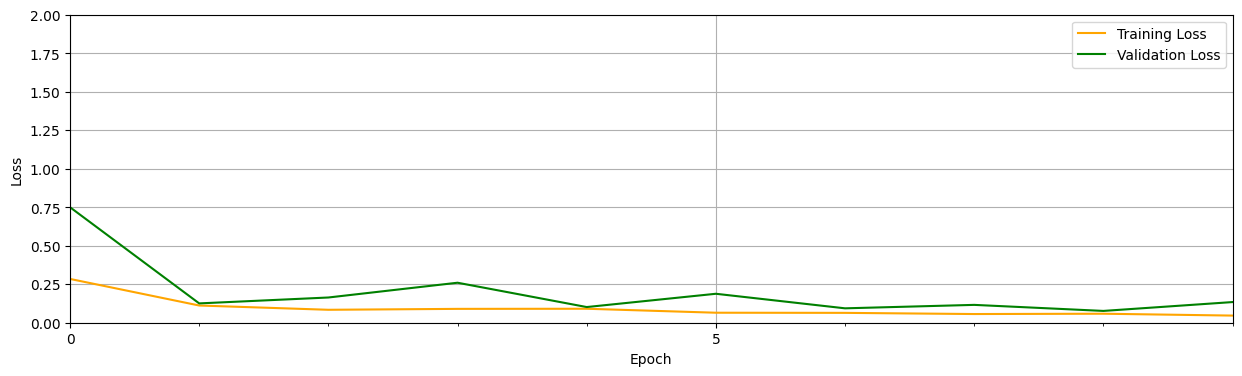

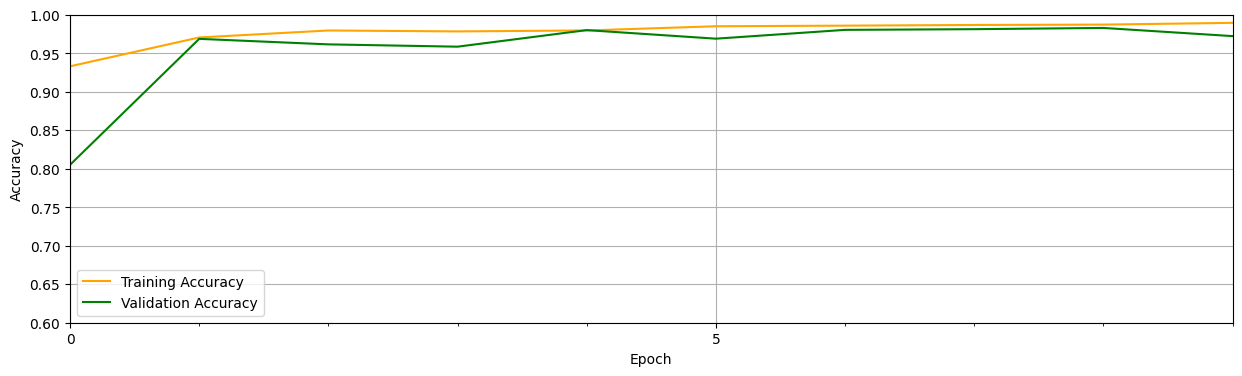

In [16]:
train_loss = trained.history['loss']
train_acc = trained.history['accuracy']
val_loss = trained.history['val_loss']
val_acc = trained.history['val_accuracy']

utils.plot_train_results(
    [train_loss, val_loss],
    epochs=EPOCHS,
    ylabel='Loss',
    ylim=[0.0, 2],
    metric_name=['Training Loss', 'Validation Loss'],
    color=['orange', 'g']
)

utils.plot_train_results(
    [train_acc, val_acc],
    epochs=EPOCHS,
    ylabel='Accuracy',
    ylim=[0.6, 1.0],
    metric_name=['Training Accuracy', 'Validation Accuracy'],
    color=['orange', 'g']
)

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc*100:.3f} %')
print(f'Test loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9730 - loss: 0.1182
Test accuracy: 97.440 %
Test loss: 0.10703254491090775
